# Aplicación 2: Escenarios macroeconómicos

## Objetivo

Explorar cómo cambia el comportamiento del portafolio bajo distintos contextos económicos.

## Instrucciones

**1. Definan tres escenarios:**

Base: usar los rendimientos originales.

Alcista: aumentar la media en +0.001.

Bajista: disminuir la media en –0.001.

**2. Simulen al menos 10,000 trayectorias para cada escenario.**

**3. Calculen para cada escenario:**

Rendimiento promedio.

Desviación estándar.

Probabilidad de pérdida.

VaR 95%.

**4. Construyan:**

Histogramas comparativos de las distribuciones.

Gráfico comparativo de medias y desviaciones estándar.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from scipy.stats import norm

In [3]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
weights = np.array([0.25, 0.25, 0.25, 0.25])

n_sim = 10000
horizon = 15
confidence = 0.95

scenarios = {
    "Base": 0,
    "Alcista": 0.001,
    "Bajista": -0.001
}

end = dt.datetime.today()
start = end - dt.timedelta(days=365*5)

prices = yf.download(tickers, start=start, end=end, progress=False)["Close"]

returns = prices.pct_change().dropna()

portfolio_returns = returns @ weights

mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

print("Media histórica:", mu)
print("Volatilidad histórica:", sigma)

Media histórica: 0.0007438464463596609
Volatilidad histórica: 0.015847694502187912


In [4]:

def simulate_paths(mu, sigma, shift, n_sim, horizon):

    mu_scenario = mu + shift

    simulations = np.zeros(n_sim)

    for i in range(n_sim):

        returns_sim = np.random.normal(
            mu_scenario,
            sigma,
            horizon
        )

        cumulative_return = np.prod(1 + returns_sim) - 1

        simulations[i] = cumulative_return

    return simulations


results = {}
metrics = []

for scenario, shift in scenarios.items():

    sim_returns = simulate_paths(mu, sigma, shift, n_sim, horizon)

    results[scenario] = sim_returns

    mean = np.mean(sim_returns)
    std = np.std(sim_returns)
    prob_loss = np.mean(sim_returns < 0)
    var_95 = np.percentile(sim_returns, 5)

    metrics.append({
        "Escenario": scenario,
        "Media": mean,
        "Desv Std": std,
        "Probabilidad de pérdida": prob_loss,
        "VaR 95%": var_95
    })

metrics_df = pd.DataFrame(metrics)

print("\nTabla de métricas:")
print(metrics_df.round(4))


Tabla de métricas:
  Escenario   Media  Desv Std  Probabilidad de pérdida  VaR 95%
0      Base  0.0115    0.0620                   0.4376  -0.0868
1   Alcista  0.0258    0.0621                   0.3438  -0.0738
2   Bajista -0.0041    0.0615                   0.5345  -0.1035


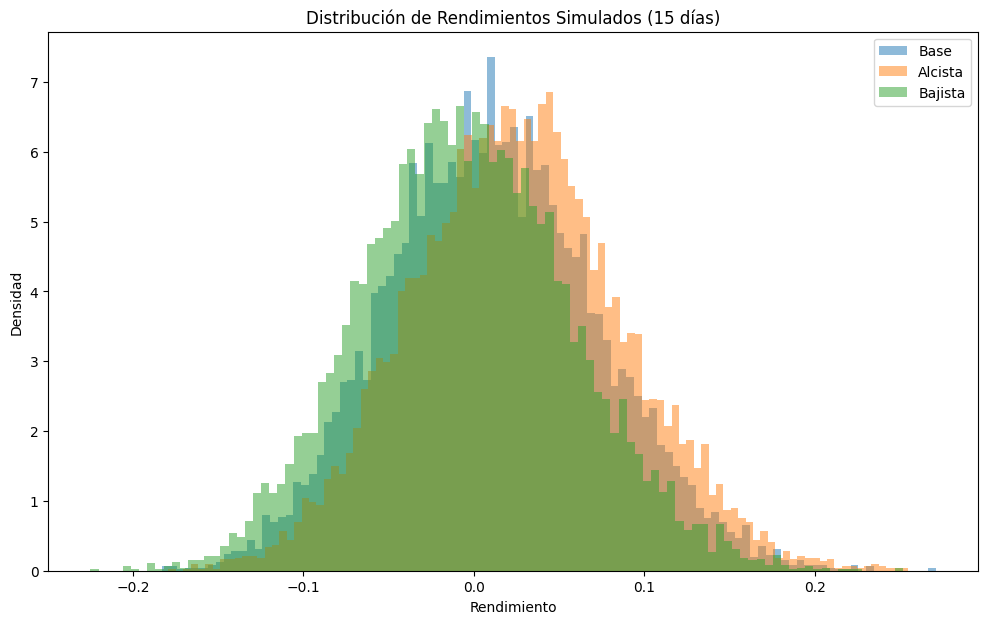

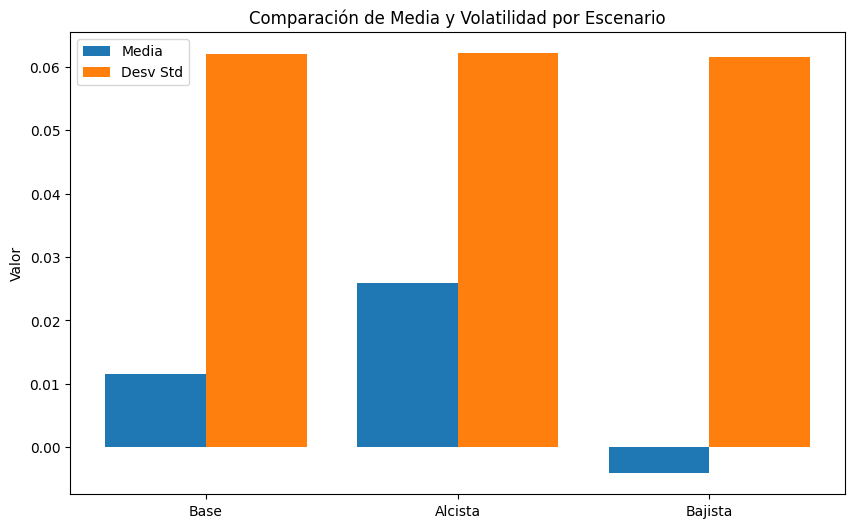

In [5]:
plt.figure(figsize=(12,7))

for scenario in scenarios.keys():

    plt.hist(
        results[scenario],
        bins=100,
        alpha=0.5,
        label=scenario,
        density=True
    )

plt.title("Distribución de Rendimientos Simulados (15 días)")
plt.xlabel("Rendimiento")
plt.ylabel("Densidad")
plt.legend()
plt.show()


x = np.arange(len(metrics_df))

plt.figure(figsize=(10,6))

plt.bar(x - 0.2, metrics_df["Media"], width=0.4, label="Media")
plt.bar(x + 0.2, metrics_df["Desv Std"], width=0.4, label="Desv Std")

plt.xticks(x, metrics_df["Escenario"])

plt.title("Comparación de Media y Volatilidad por Escenario")
plt.ylabel("Valor")
plt.legend()

plt.show()

**5. Analicen:**

- ¿En qué escenario la probabilidad de pérdida es mayor?

En la bajista. 


- ¿Cuál presenta mayor dispersión de resultados?

En la alcista.

- ¿Cambian de manera relevante las métricas de riesgo extremo?

No mucho, en realidad lo que más cambia es el rendimiento medio.
 